In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv('digit-recognizer/train.csv')
test_data = pd.read_csv('digit-recognizer/test.csv')

In [4]:
train_data.isnull().sum().sum()

0

In [5]:
test_data.isnull().sum().sum()

0

In [6]:
for column in train_data.keys():
    print(column, ' : ', train_data[column].sum())

label  :  187179
pixel0  :  0
pixel1  :  0
pixel2  :  0
pixel3  :  0
pixel4  :  0
pixel5  :  0
pixel6  :  0
pixel7  :  0
pixel8  :  0
pixel9  :  0
pixel10  :  0
pixel11  :  0
pixel12  :  126
pixel13  :  470
pixel14  :  216
pixel15  :  9
pixel16  :  0
pixel17  :  0
pixel18  :  0
pixel19  :  0
pixel20  :  0
pixel21  :  0
pixel22  :  0
pixel23  :  0
pixel24  :  0
pixel25  :  0
pixel26  :  0
pixel27  :  0
pixel28  :  0
pixel29  :  0
pixel30  :  0
pixel31  :  0
pixel32  :  16
pixel33  :  55
pixel34  :  443
pixel35  :  1145
pixel36  :  2138
pixel37  :  2789
pixel38  :  5442
pixel39  :  7313
pixel40  :  8035
pixel41  :  8005
pixel42  :  8234
pixel43  :  7197
pixel44  :  6908
pixel45  :  6372
pixel46  :  4423
pixel47  :  2553
pixel48  :  1893
pixel49  :  647
pixel50  :  442
pixel51  :  212
pixel52  :  0
pixel53  :  0
pixel54  :  0
pixel55  :  0
pixel56  :  0
pixel57  :  0
pixel58  :  64
pixel59  :  29
pixel60  :  308
pixel61  :  379
pixel62  :  2567
pixel63  :  6345
pixel64  :  12426
pixel65  

In [7]:
for column in test_data.keys():
    print(column, ' : ', test_data[column].sum())

pixel0  :  0
pixel1  :  0
pixel2  :  0
pixel3  :  0
pixel4  :  0
pixel5  :  0
pixel6  :  0
pixel7  :  0
pixel8  :  0
pixel9  :  0
pixel10  :  0
pixel11  :  0
pixel12  :  0
pixel13  :  0
pixel14  :  0
pixel15  :  0
pixel16  :  0
pixel17  :  0
pixel18  :  0
pixel19  :  0
pixel20  :  0
pixel21  :  0
pixel22  :  0
pixel23  :  0
pixel24  :  0
pixel25  :  0
pixel26  :  0
pixel27  :  0
pixel28  :  0
pixel29  :  0
pixel30  :  0
pixel31  :  0
pixel32  :  0
pixel33  :  38
pixel34  :  350
pixel35  :  470
pixel36  :  888
pixel37  :  1568
pixel38  :  2813
pixel39  :  4674
pixel40  :  5504
pixel41  :  5301
pixel42  :  6206
pixel43  :  5595
pixel44  :  4999
pixel45  :  3744
pixel46  :  2524
pixel47  :  2223
pixel48  :  1528
pixel49  :  635
pixel50  :  163
pixel51  :  0
pixel52  :  0
pixel53  :  0
pixel54  :  0
pixel55  :  0
pixel56  :  0
pixel57  :  0
pixel58  :  0
pixel59  :  13
pixel60  :  109
pixel61  :  387
pixel62  :  1374
pixel63  :  3412
pixel64  :  6350
pixel65  :  14055
pixel66  :  27650
pix

In [8]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_data.shape

(42000, 785)

In [10]:
y = train_data['label']
x = train_data.drop(['label'], axis=1)

In [11]:
#dropping the pixels which are zero in all the images
drop_list = []
for column in x.keys():
    if x[column].sum() ==0 and test_data[column].sum()==0:
        drop_list.append(column)

In [12]:
print(drop_list)

x.drop(drop_list, axis=1, inplace = True)
test_data.drop(drop_list, axis=1, inplace = True)

print(test_data.shape)

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel111', 'pixel112', 'pixel140', 'pixel168', 'pixel476', 'pixel560', 'pixel644', 'pixel671', 'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727', 'pixel728', 'pixel729', 'pixel730', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 'pixel758', 'pixel759', 'pixel780', 'pixel781', 'pixel782', 'pixel783']
(28000, 719)


In [13]:
x.shape

(42000, 719)

In [14]:
test_data

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split as tts

xtrain, xtest, ytrain, ytest = tts(x,y,stratify=y, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as crp

In [22]:
# Decision Tree Classifier
tree = DTC()
tree.fit(xtrain, ytrain)


print(tree.score(xtrain, ytrain))
print(tree.score(xtest, ytest))

ypred = tree.predict(xtest)

print(cm(ytest, ypred))
print(crp(ytest, ypred))

1.0
0.8583809523809524
[[ 935    2   12    6    9   22   23    6    9    9]
 [   2 1107    9   10    5    9    3    5   10   11]
 [  15    9  877   28   11   14   21   20   37   12]
 [  10   14   41  884   16   44   16   14   30   19]
 [   5   12   12    7  873    7   15    9   20   58]
 [  22    8    9   50   12  763   30    8   25   22]
 [  10    3   11    4   19   30  936    2   17    2]
 [   5    4   26   19   17    5    1  988   11   24]
 [  23   28   42   40   16   35   22   12  777   21]
 [   8    8    9   20   54   22    5   29   19  873]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1033
           1       0.93      0.95      0.94      1171
           2       0.84      0.84      0.84      1044
           3       0.83      0.81      0.82      1088
           4       0.85      0.86      0.85      1018
           5       0.80      0.80      0.80       949
           6       0.87      0.91      0.89      1034
           7 

In [24]:
#Decision Tree classifier with GridSearch
params = {'max_depth' : [10,15], 'max_features': [300,450], 'min_samples_leaf':[1,2,4] }

Gstree = GridSearchCV(DTC(random_state=42), params, scoring='accuracy', cv=5, n_jobs=-1)
Gstree.fit(xtrain, ytrain)

print(Gstree.best_score_)
print(Gstree.best_params_)

ypred = Gstree.predict(xtest)
print(Gstree.score(xtest, ytest))
print(cm(ytest, ypred))
print(crp(ytest, ypred))

print("accuracy on training data = ",Gstree.score(xtrain, ytrain))

0.8480634920634921
{'max_depth': 15, 'max_features': 450, 'min_samples_leaf': 2}
0.8577142857142858
[[ 964    1   11   11    4   20   13    2    6    1]
 [   0 1121   11    5    8    3    4    5   13    1]
 [  16   11  889   45   18    9   14   17   20    5]
 [   6   15   43  902   10   41    9   14   28   20]
 [   8    6   24    5  866    5   13    9   16   66]
 [  18   24   18   51   12  748   21    3   36   18]
 [  21    8   26    8   16   32  904    1   15    3]
 [   8   10   31   15   14    7    2  983    8   22]
 [  17   26   37   45   26   28   24   14  775   24]
 [   8    8   23   29   45   17    4   38   21  854]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1033
           1       0.91      0.96      0.93      1171
           2       0.80      0.85      0.82      1044
           3       0.81      0.83      0.82      1088
           4       0.85      0.85      0.85      1018
           5       0.82      0.79      0.80 

In [29]:
#Gradient Boosting Classifier

gbc = GBC(learning_rate=0.15, n_estimators=100, random_state=40, max_depth=4)
gbc.fit(xtrain, ytrain)

y_pred = gbc.predict(xtest)

print(gbc.score(xtrain, ytrain))
print(gbc.score(xtest, ytest))

print(cm(ytest, y_pred))

0.9989206349206349
0.9596190476190476
[[1012    0    2    0    2    3    4    0    8    2]
 [   0 1157    5    3    1    0    2    0    2    1]
 [   3    3 1006    7   10    0    1    5    7    2]
 [   4    3   16 1019    2   19    0    5   12    8]
 [   0    3    4    0  980    0    3    1    2   25]
 [   4    2    3   16    4  898    7    2   10    3]
 [   3    1    3    0    2   10 1009    0    6    0]
 [   0    3   10    5    3    1    0 1056    3   19]
 [   3    5    8    7    2    9    8    3  956   15]
 [   2    3    1    3   14    6    0   26    9  983]]


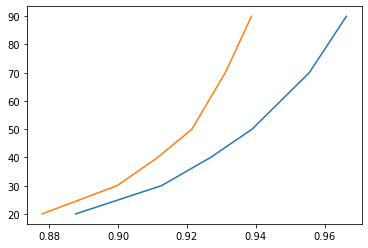

In [36]:
#Observing effectiveness of Gradient Boosting with increase in n_estimators
test_accuracy = []
training_accuracy = []
n_estimators = [20,30,40,50,70,90]

for n in n_estimators:
    gbc = GBC(n_estimators=n)
    gbc.fit(xtrain, ytrain)
    
    training_accuracy.append(gbc.score(xtrain, ytrain))
    test_accuracy.append(gbc.score(xtest, ytest))

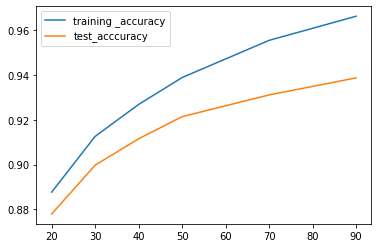

In [37]:
plt.plot( n_estimators, training_accuracy, label = 'training _accuracy')
plt.plot( n_estimators, test_accuracy, label = 'test_acccuracy')
plt.legend(loc = 'best')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

In [38]:
print(test_accuracy)
print(training_accuracy)

[0.8779047619047619, 0.8997142857142857, 0.9115238095238095, 0.9214285714285714, 0.9311428571428572, 0.9387619047619048]
[0.8876507936507937, 0.9126031746031746, 0.9268888888888889, 0.9389206349206349, 0.9555555555555556, 0.9663492063492064]


In [39]:
gbctree = GBC(learning_rate=0.15, n_estimators=85, random_state=40, max_depth=4)
gbctree.fit(x,y)

print(gbctree.score(x,y))

0.9945238095238095


In [45]:
predicted_digits_on_test_data = gbctree.predict(test_data)

predicted_digits_on_test_data = pd.DataFrame(predicted_digits_on_test_data)
print(predicted_digits_on_test_data.head())

predicted_digits_on_test_data.to_csv(r'submission.csv', index=False)

   0
0  2
1  0
2  9
3  7
4  2


In [ ]:
tsne = TSNE(random_state = 0)
tsne.fit_transform(x)

for i in range(len(x)):
    plt.text(tsne[i,0], tsne[i,1], s = str(y[i]), color=colors[y[i]])